**0. Import Libraries**

In [408]:
import numpy as np # A useful package for dealing with mathematical processes, we will be using it this week for vectors and matrices
import pandas as pd # A common package for viewing tabular data
import sklearn.linear_model, sklearn.datasets # We want to be able to access the sklearn datasets again, also we are using some model evaluation
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler # We will be using the inbuilt preprocessing functions sklearn provides
import matplotlib.pyplot as plt # We will be using Matplotlib for our graphs
from sklearn.model_selection import train_test_split # A library that can automatically perform data splitting for us
from sklearn.linear_model import Ridge, Lasso # Ridge & Lasso regression are types of linear model that use regularisation
from sklearn.impute import SimpleImputer # Performs basic imputations when doing preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # We will be using these to encode categorical features
from sklearn.metrics import mean_squared_error # Allows us to use the MSE function without calling in sklearn each time
from google.colab import files # We will be importing a csv file I have provided for one section.
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # suppresses a convergence warning we may get when testing Lasso.

**1. Data preprocessing**

In [409]:
# Load the house price datasets
house_train = pd.read_csv('housing_coursework_train.csv') # Save it to a pandas dataframe
house_test = pd.read_csv('housing_coursework_test.csv')


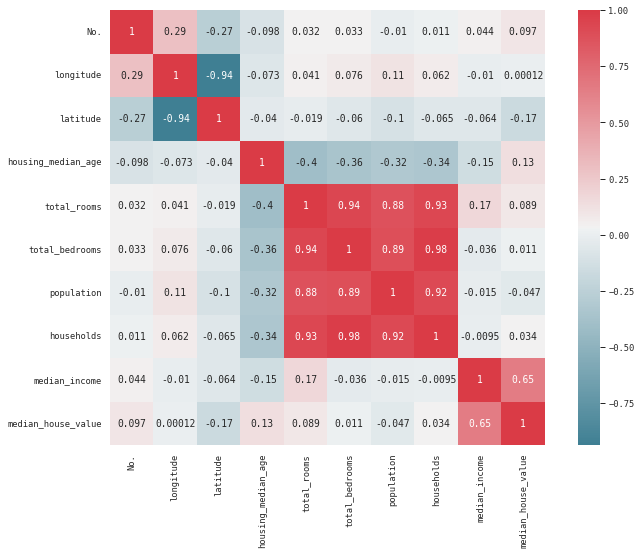

In [410]:
#heatmap using seaborn
#set the context for plotting 
sns.set(context="paper",font="monospace")
housing_corr_matrix = house_train.corr()
#set the matplotlib figure
fig, axe = plt.subplots(figsize=(12,8))
#Generate color palettes 
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
#draw the heatmap
sns.heatmap(housing_corr_matrix,vmax=1,square =True, cmap=cmap,annot=True );

**Finding and handling missing data**

In [411]:
# Finding the null values.
print(house_train.isnull().sum())
print(house_test.isnull().sum())

No.                   0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        8
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
No.                   0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        1
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [412]:
result_train = house_train['total_bedrooms'].mean()
result_test = house_test['total_bedrooms'].mean()
house_test['total_bedrooms'].fillna(result_train, inplace=True)
house_train['total_bedrooms'].fillna(result_test, inplace=True)

In [413]:
# Finding the null values.
print(house_train.isnull().sum())
print(house_test.isnull().sum())

No.                   0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
No.                   0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


**Encoding for Ocean Proximity**


In [414]:
df_train =house_train
df_test = house_test
display(df_train)
display(df_test)

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,1,-122.21,37.83,34,5065,788.0,1627,766,6.8976,333300,NEAR BAY
1,2,-122.22,37.77,52,391,128.0,520,138,1.6471,95000,NEAR BAY
2,3,-122.23,37.79,30,610,145.0,425,140,1.6198,122700,NEAR BAY
3,4,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,NEAR BAY
4,5,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
795,796,-122.55,37.79,32,2131,625.0,1229,572,2.9201,322200,NEAR OCEAN
796,797,-121.29,37.96,52,287,119.0,154,85,0.8738,75000,INLAND
797,798,-121.32,37.97,46,2270,427.0,1097,453,3.3235,87800,INLAND
798,799,-121.29,37.97,52,2995,555.0,1392,503,1.7794,98800,INLAND


,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,801,-121.26,37.93,33,2109,531.0,2248,588,1.4583,53000,INLAND
1,802,-121.28,37.94,40,2806,685.0,2268,635,1.8814,57700,INLAND
2,803,-121.24,37.98,33,450,123.0,236,103,1.1964,80400,INLAND
3,804,-121.23,37.96,44,2204,473.0,1277,435,1.5539,59200,INLAND
4,805,-121.33,38.00,32,4474,929.0,2177,884,3.2889,98900,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
215,1016,-121.70,38.65,22,1360,282.0,808,229,2.4167,225000,INLAND
216,1017,-121.92,38.57,10,1320,246.0,898,228,1.9327,193800,INLAND
217,1018,-122.00,38.83,26,272,49.0,194,52,3.4187,98400,INLAND
218,1019,-122.03,38.69,23,1796,380.0,939,330,2.7955,96300,INLAND


In [415]:
# Shuffle dataset (just for experiments)
rng = np.random.default_rng(0)
df_train_shuffle = df_train.iloc[rng.permutation(len(df_train))].reset_index(drop=True)
df_test_shuffle = df_test.iloc[rng.permutation(len(df_test))].reset_index(drop=True)

In [416]:
# Choosing features
col = ['longitude','latitude','population', 'housing_median_age','total_rooms','total_bedrooms','households','median_income','ocean_proximity']
# defined a new variable for the column names to make it easier to experiment with adding or removing columns
X_non_test_raw= df_train_shuffle[col]
X_raw_test =df_test_shuffle[col]
y_non_test = df_train_shuffle['median_house_value']
y_test = df_test_shuffle['median_house_value']



In [417]:
#split again for scaling
col1=['longitude','latitude','population', 'housing_median_age','total_rooms','total_bedrooms','households','median_income']
col2=['ocean_proximity']

X_train_num=X_non_test_raw[col1]
X_test_num=X_raw_test[col1]
X_train_cat=X_non_test_raw[col2]
X_test_cat=X_raw_test[col2]




In [418]:
#scaling
scaler =MinMaxScaler()
scaler.fit(X_train_num)
X_train_num_sca=scaler.transform(X_train_num)
X_test_num_sca =scaler.transform(X_test_num)

In [419]:
print(X_train_num_sca)


[[0.7881549  0.08078335 0.06432047 ... 0.07451429 0.07754801 0.29385614]
 [0.80410023 0.0244798  0.08005066 ... 0.15634286 0.16100443 0.07541961]
 [0.22323462 0.64014688 0.02606145 ... 0.03062857 0.03200394 0.0528093 ]
 ...
 [0.64350797 0.20318237 0.08431647 ... 0.11474286 0.11989168 0.19431132]
 [0.71981777 0.15789474 0.         ... 0.         0.         0.31296943]
 [0.75284738 0.16034272 0.02146237 ... 0.02742857 0.02831118 0.17116301]]


In [420]:
#one hot encoding
# create the encoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Fit encoder on teh training data
encoder.fit(X_train_cat)
# Transform the test and train data
X_train_onehot = encoder.transform(X_train_cat)
X_test_onehot = encoder.transform(X_test_cat)

X_train = np.concatenate([X_train_num_sca, X_train_onehot], axis=1)
X_test = np.concatenate([X_test_num_sca, X_test_onehot], axis=1)
display(X_train)
display(X_test)

array([[0.7881549 , 0.08078335, 0.06432047, ..., 0.        , 0.        ,
        0.        ],
       [0.80410023, 0.0244798 , 0.08005066, ..., 0.        , 0.        ,
        1.        ],
       [0.22323462, 0.64014688, 0.02606145, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.64350797, 0.20318237, 0.08431647, ..., 0.        , 0.        ,
        0.        ],
       [0.71981777, 0.15789474, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.75284738, 0.16034272, 0.02146237, ..., 1.        , 0.        ,
        0.        ]])

array([[0.26082005, 0.58017136, 0.03652603, ..., 0.        , 0.        ,
        0.        ],
       [0.24487472, 0.58629131, 0.04412451, ..., 0.        , 0.        ,
        0.        ],
       [0.2642369 , 0.57037944, 0.0678531 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.25512528, 0.57405141, 0.0998467 , ..., 0.        , 0.        ,
        0.        ],
       [0.17767654, 0.70746634, 0.0629874 , ..., 0.        , 0.        ,
        0.        ],
       [0.27334852, 0.74785802, 0.12277544, ..., 1.        , 0.        ,
        0.        ]])

In [421]:

# Split the data for train and validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_non_test, test_size=0.25, shuffle=True, random_state=0)

In [422]:
print(X_train)

[[0.24601367 0.62790698 0.00326601 ... 0.         1.         0.        ]
 [0.69248292 0.16034272 0.1158435  ... 0.         0.         0.        ]
 [0.69020501 0.16768666 0.07918416 ... 0.         0.         0.        ]
 ...
 [0.34851936 0.72337821 0.06711991 ... 1.         0.         0.        ]
 [0.67425968 0.16891065 0.07651803 ... 0.         0.         0.        ]
 [0.72779043 0.14443084 0.10037992 ... 0.         0.         0.        ]]


alpha: 1e-10, Validation mean squared error: 5120194889.660758.
alpha: 1e-09, Validation mean squared error: 5120194881.841977.
alpha: 1e-08, Validation mean squared error: 5120194803.654176.
alpha: 1e-07, Validation mean squared error: 5120194021.776672.
alpha: 1e-06, Validation mean squared error: 5120186203.05215.
alpha: 1e-05, Validation mean squared error: 5120108020.85213.
alpha: 0.0001, Validation mean squared error: 5119326702.966857.
alpha: 0.001, Validation mean squared error: 5111563531.243025.
alpha: 0.01, Validation mean squared error: 5038571307.987446.
alpha: 0.1, Validation mean squared error: 4589959921.588018.
alpha: 1.0, Validation mean squared error: 4258730938.4084935.
alpha: 10.0, Validation mean squared error: 5504400883.50619.
alpha: 100.0, Validation mean squared error: 7929506209.131862.
alpha: 1000.0, Validation mean squared error: 9799703154.571623.
alpha: 10000.0, Validation mean squared error: 10501684553.939869.
alpha: 100000.0, Validation mean squared er

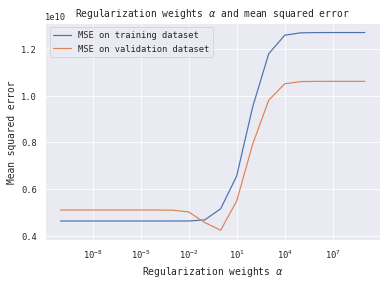

The best alpha: 1.0
MSE on the test data: 4375489168.946677


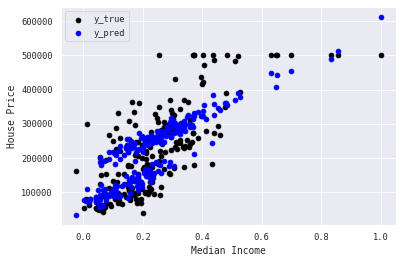

R2 score: 0.7195
[-180061.80133873486, -134711.3229540241, -216987.70615865925, 59548.19742857545, 14218.920930266502, 127392.94374332411, 82087.8546058652, 450393.7992793947, 22899.420351686716, -41596.730496378535, -2698.095587711414, 21395.405732407413]


In [423]:

alpha_indices = np.arange(20) # Get a list of 1-20
alphas = 10.0 ** (alpha_indices-10) # Define a list of alphas by taking indices from -1 to -20


#######################
# Training & validation 
#######################



# Get the MSE arrays
mse_train_array = np.full([len(alphas)], np.nan) 
mse_valid_array = np.full([len(alphas)], np.nan)

# Loop to test alpha values
for alpha_index, alpha in zip(alpha_indices, alphas):
  # train
  #model = Lasso(alpha=alpha) # fits our lasso model with a new regularisation weight each iteration
  model = Ridge(alpha=alpha) # fits our ridge model with a new regularisation weight each iteration
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_pred_train)

  # Validation
  y_pred_valid = model.predict(X_valid)
  mse_valid = mean_squared_error(y_valid, y_pred_valid)

  # Store MSEs for this iteration
  mse_train_array[alpha_index] = mse_train
  mse_valid_array[alpha_index] = mse_valid
  print(f'alpha: {alpha}, Validation mean squared error: {mse_valid}.')

# Plot our graph of MSE for training and validation 
plt.plot(alphas, mse_train_array, label='MSE on training dataset')
plt.plot(alphas, mse_valid_array, label='MSE on validation dataset')
plt.xlabel(r'Regularization weights $\alpha$')
plt.ylabel('Mean squared error')
plt.title(r'Regularization weights $\alpha$ and mean squared error')
plt.xscale('log')
plt.legend()
plt.show()

# Select our best performing alpha (lowest MSE)
best_alpha_index = np.argmin(mse_valid_array)
best_alpha = alphas[best_alpha_index]
print('The best alpha:', best_alpha)

######
# Test
######

#refit our model with the best alpha
#model = Lasso(alpha=best_alpha) # fits our lasso model with a new regularisation weight each iteration
model = Ridge(alpha=best_alpha) # fits our ridge model with a new regularisation weight each iteration
model.fit(X_train, y_train)



# Predict test data
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print('MSE on the test data:', mse_test)

# Plot outputs
plt.scatter(X_test[:,7], y_test,  color='black', label='y_true') # Observed y values
plt.scatter(X_test[:,7], y_pred_test, color='blue', label='y_pred') # predicted y values
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.legend()
plt.show()

# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, y_pred_test)))


# View coefs
coefList=model.coef_.tolist()
print(coefList)